# Getting Started

In [1]:
import pandas as pd, numpy as np, glob, seaborn as sns, datetime
import matplotlib.dates as mdates, matplotlib as mpl, matplotlib.pyplot as plt;
from matplotlib import ticker
sns.set_style('whitegrid')
sns.set_context("notebook", font_scale=1.1, rc={"lines.linewidth": 2})

In [2]:
## Reads all csv in folder
df = pd.concat([pd.read_csv(f, parse_dates=['DATE_TIME'])
                for f in glob.glob('../src/solar_power_generation_india/*Generation*.csv')]
               , ignore_index = True)

In [3]:
df.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [4]:
## Stuff I change to make my life easy
df['date'] = pd.to_datetime(df['DATE_TIME'].dt.date)
df['time'] = df['DATE_TIME'].dt.strftime('%H:%M')
df['PLANT_ID'] = df['PLANT_ID'].apply(lambda x: '#' + str(x)) # Categorizes numeric IDs

positions = np.arange(0, 96, 4)
labels = pd.date_range("00:00", "23:45", freq="1H").strftime('%H:%M').values

data = df[['time', 'PLANT_ID', 'DC_POWER', 'AC_POWER']].melt(id_vars=['time', 'PLANT_ID'])

# How Solar Energy Works
As Sunlight hits solar panels, energy is released and generated as *Direct Current* or DC power. This is then converted into *Alternating Current* or AC power. Whatch this [funny video](https://www.youtube.com/watch?v=S7C5sSde9e4) to know more about the difference but, basically, AC power is more efficient and safer to transport than DC power.

# Current Statu


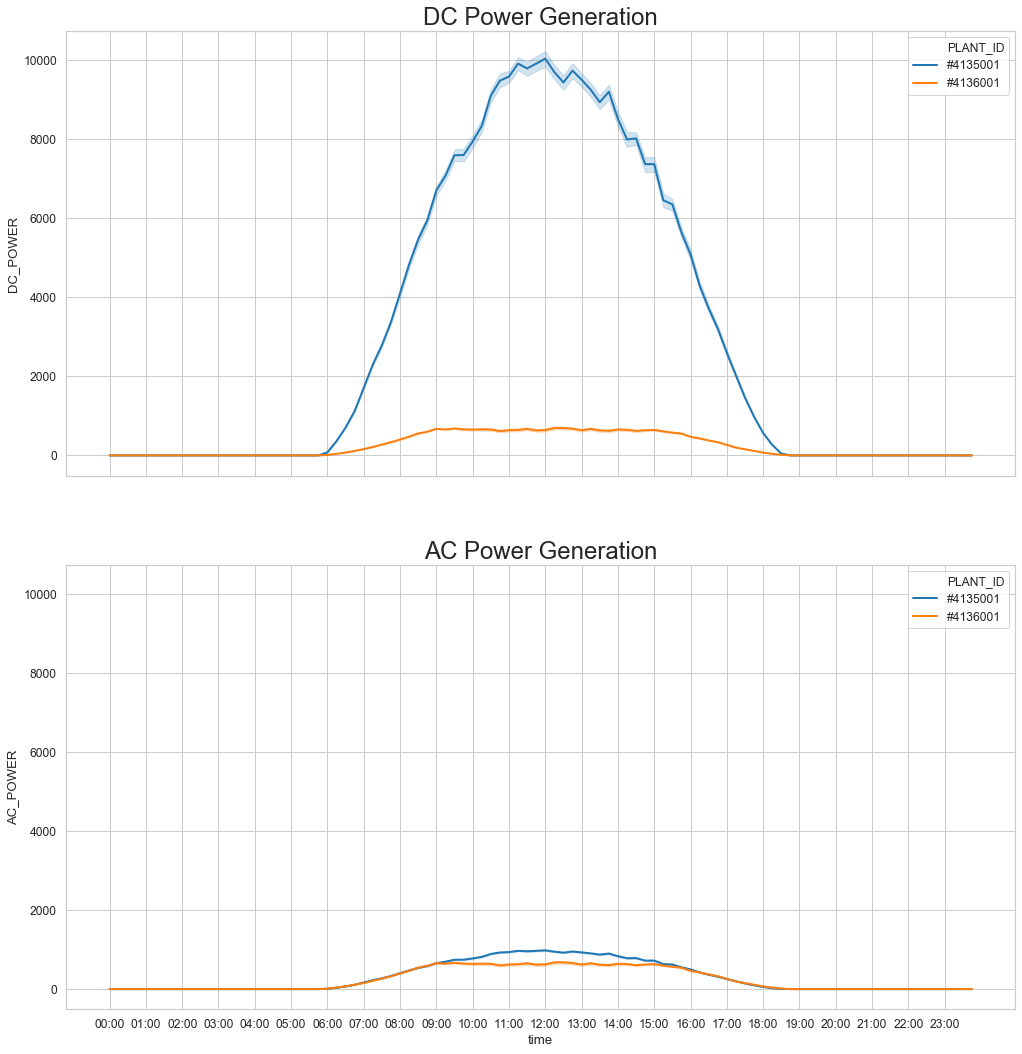

In [57]:
fig, ax = plt.subplots(2, figsize=(17,18), sharex=True, sharey=True)
(sns.lineplot('time', 'DC_POWER', data=df, hue='PLANT_ID', ax=ax[0])
    .set_title("DC Power Generation", fontdict = {'fontsize':24}))
(sns.lineplot('time', 'AC_POWER', data=df, hue='PLANT_ID', ax=ax[1])
    .set_title("AC Power Generation", fontdict = {'fontsize':24}))
ax[0].xaxis.set_major_locator(ticker.FixedLocator(positions))
ax[0].xaxis.set_major_formatter(ticker.FixedFormatter(labels))